In [4]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # plot 3-d figures
import matplotlib.cm as cm

In [5]:
# read in data from the file
tran_df = pd.read_csv('transactions_n100000.csv')
print(tran_df.info()) 
print(tran_df.isnull().sum()) # no missing values
tran_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260741 entries, 0 to 260740
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ticket_id        260741 non-null  object 
 1   order_timestamp  260741 non-null  object 
 2   location         260741 non-null  int64  
 3   item_name        260741 non-null  object 
 4   item_count       260741 non-null  int64  
 5   lat              260741 non-null  float64
 6   long             260741 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB
None
ticket_id          0
order_timestamp    0
location           0
item_name          0
item_count         0
lat                0
long               0
dtype: int64


,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


## Data Preprocessing and Exploratory Data Analysis

In [6]:
# check if there are duplicate data points
length1 = len(tran_df)
print('The size of the data before dropping duplicate values: %s'% length1)
# drop duplicate values
tran_df.drop_duplicates(keep = False, inplace = True)
length2 = len(tran_df)
print('The size of the data after dropping duplicate values: %s' % length2)
tran_df.info()

The size of the data before dropping duplicate values: 260741
The size of the data after dropping duplicate values: 260741
<class 'pandas.core.frame.DataFrame'>
Int64Index: 260741 entries, 0 to 260740
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ticket_id        260741 non-null  object 
 1   order_timestamp  260741 non-null  object 
 2   location         260741 non-null  int64  
 3   item_name        260741 non-null  object 
 4   item_count       260741 non-null  int64  
 5   lat              260741 non-null  float64
 6   long             260741 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 15.9+ MB


In [7]:
# remove the trick_id column
tran_df.drop(columns = 'ticket_id', inplace = True)
tran_df.head(2)

,order_timestamp,location,item_name,item_count,lat,long
0,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605


In [8]:
# process the datetime feature
tran_df['order_timestamp'] = pd.to_datetime(tran_df.order_timestamp, format='%Y-%m-%d')
tran_df.head()


,order_timestamp,location,item_name,item_count,lat,long
0,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


In [ ]:
df.groupby(['location'], as_index=False).agg({'item_count': 'sum'})
df12 = tran_df.groupby(['location'],as_index = Fale).

In [9]:
# reshape the time variable
df = tran_df.copy()
df['year'] = pd.DatetimeIndex(df['order_timestamp']).year
df['month'] = pd.DatetimeIndex(df['order_timestamp']).month
df['week'] = pd.DatetimeIndex(df['order_timestamp']).week
df['day'] = pd.DatetimeIndex(df['order_timestamp']).day
df['hour'] = pd.DatetimeIndex(df['order_timestamp']).hour
df.head(2)

,order_timestamp,location,item_name,item_count,lat,long,year,month,week,day,hour
0,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,2019,2,9,28,18
1,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,2019,2,9,28,18


In [10]:
df.describe()

,location,item_count,lat,long,year,month,week,day,hour
count,260741.000000,260741.000000,260741.000000,260741.000000,260741.0,260741.000000,260741.000000,260741.000000,260741.000000
mean,5.128123,2.446424,41.836145,-87.733627,2019.0,6.513111,26.506633,15.689508,12.115172
std,2.557513,1.330490,0.144791,0.135937,0.0,3.449359,15.046365,8.783419,7.525635
min,1.000000,1.000000,41.524598,-88.010140,2019.0,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,41.784576,-87.849468,2019.0,4.000000,13.000000,8.000000,1.000000
50%,5.000000,2.000000,41.881818,-87.677606,2019.0,7.000000,27.000000,16.000000,13.000000
75%,7.000000,4.000000,41.889047,-87.627059,2019.0,10.000000,40.000000,23.000000,18.000000
max,9.000000,5.000000,42.049306,-87.607565,2019.0,12.000000,52.000000,31.000000,23.000000


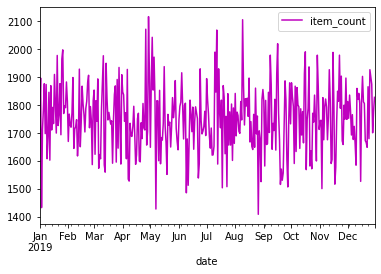

In [11]:
# draw plots of variable item_count and date
df1 = df.groupby(['year','month','day'], as_index=False).agg({'item_count': 'sum'})
df1['date'] = pd.to_datetime(dict(year=df1.year, month=df1.month, day=df1.day))
df1.plot(x = 'date' , y ='item_count', kind = 'line', color = 'm')

The graph above shows that the number of item counts in different dates are different. Therefore we do need to create dummy variables of dates.

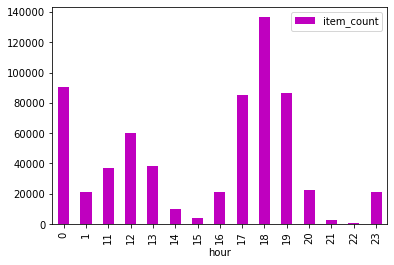

In [12]:
# draw plots of variable item_count and hour
df2 = df.groupby(['hour'], as_index=False).agg({'item_count': 'sum'})
df2.plot(x = 'hour', y ='item_count', kind = 'bar', color = 'm')

The graph above shows that the number of item counts are related to different hours.Therefore we can create dummy variables of hours.

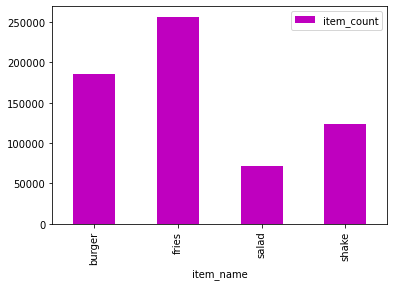

In [13]:
# draw plots of variable item_count and item_name
df3 = df.groupby(['item_name'], as_index=False).agg({'item_count': 'sum'})
df3.plot(x = 'item_name', y ='item_count', kind = 'bar', color = 'm')

The graph above shows that the number of item counts are related to different items. Therefore we can create dummy variables of items.

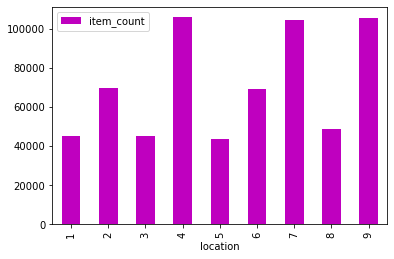

In [14]:
# draw plots of variable item_count and location
df4 = df.groupby(['location'], as_index=False).agg({'item_count': 'sum'})
df4.plot(x = 'location', y ='item_count', kind = 'bar', color = 'm')

The graph above shows that the number of item counts are related to different locations. Therefore we can create dummy variables of locations.

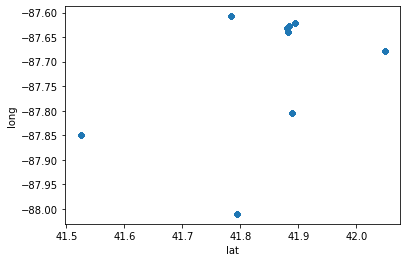

In [15]:
# generate the scatter plot of geographic positions
df.plot(x = 'lat', y = 'long', kind = 'scatter')
# display the plot
plt.show()

In [70]:
df_loc = df.groupby(['lat','long','location'],as_index=False).agg({'item_count':'sum'})
df_loc

,lat,long,location,item_count
0,41.524598,-87.849468,9,105364
1,41.784576,-87.607565,6,69261
2,41.794132,-88.010140,7,104429
3,41.880844,-87.630524,1,45404
4,41.881818,-87.640234,5,43748
5,41.884490,-87.627059,3,45256
6,41.889047,-87.803605,4,105854
7,41.894202,-87.620965,8,48759
8,42.049306,-87.677606,2,69808


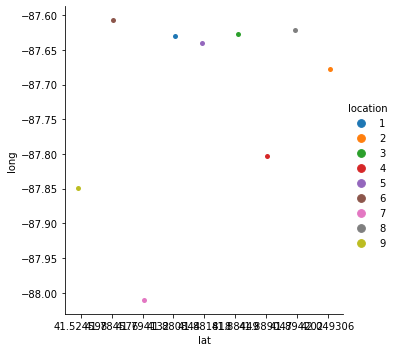

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
g = sns.catplot(x = 'lat', y = 'long', data = df_loc, hue = 'location' )


In [17]:
df['date'] = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260741 entries, 0 to 260740
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   order_timestamp  260741 non-null  datetime64[ns]
 1   location         260741 non-null  int64         
 2   item_name        260741 non-null  object        
 3   item_count       260741 non-null  int64         
 4   lat              260741 non-null  float64       
 5   long             260741 non-null  float64       
 6   year             260741 non-null  int64         
 7   month            260741 non-null  int64         
 8   week             260741 non-null  int64         
 9   day              260741 non-null  int64         
 10  hour             260741 non-null  int64         
 11  date             260741 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(7), object(1)
memory usage: 25.9+ MB
None


Based on the graph  and the table above, we can drop variables 'lat' and 'long' because  these infomation are reflected in the variable location.

In [18]:
# remove undesired columns
drop_columns = [ 'order_timestamp','lat', 'long','year','month','week','day']
n_df = df.copy()
n_df.drop(columns = drop_columns, inplace = True)
n_df.head(2)

,location,item_name,item_count,hour,date
0,4,shake,2,18,2019-02-28
1,4,burger,2,18,2019-02-28


In [20]:
k_df = n_df.copy()

In [21]:
df5 = k_df.groupby(['location', 'item_name','hour','date'], as_index=False).agg({'item_count': 'sum'})
print(df5.shape)
print(df5.info())
print(df5.head())

(79397, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79397 entries, 0 to 79396
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   location    79397 non-null  int64         
 1   item_name   79397 non-null  object        
 2   hour        79397 non-null  int64         
 3   date        79397 non-null  datetime64[ns]
 4   item_count  79397 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 3.6+ MB
None
   location item_name  hour       date  item_count
0         1    burger     0 2019-01-02           4
1         1    burger     0 2019-01-03           4
2         1    burger     0 2019-01-04           7
3         1    burger     0 2019-01-06           3
4         1    burger     0 2019-01-07           4


In [22]:
# Based on the infomation of the above table, we can create dummy variables for hour, item_names, location
# convert categorical features to numerical features
df6 = df5.copy()
df6.drop(columns = 'date', inplace = True)
df6 = pd.get_dummies(df6,prefix = ['item_name', 'location','hour'], columns = ['item_name','location','hour'])
print(df6.head(2))
print(df6.shape)
print(df6.info())

   item_count  item_name_burger  item_name_fries  item_name_salad  \
0           4                 1                0                0   
1           4                 1                0                0   

   item_name_shake  location_1  location_2  location_3  location_4  \
0                0           1           0           0           0   
1                0           1           0           0           0   

   location_5  ...  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  \
0           0  ...        0        0        0        0        0        0   
1           0  ...        0        0        0        0        0        0   

   hour_20  hour_21  hour_22  hour_23  
0        0        0        0        0  
1        0        0        0        0  

[2 rows x 29 columns]
(79397, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79397 entries, 0 to 79396
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  ----

## Data normalizaiton

In [23]:
X = df6.values
num_samples, num_features = X.shape
print('feature dim:', X.shape)


feature dim: (79397, 29)


In [24]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(X)  # apply min_max scale
X_recon = minmaxscaler.inverse_transform(X_scaled)  # apply the inverse of min_max scale

In [25]:
X_scaled.shape

(79397, 29)

In [26]:
X_recon.shape

(79397, 29)

## Modeling

### Question: 
- Kmeans algorithm can be very slow when dealing with large size of data
Can we split the data set first and use training data to decide best parameters of model, then apply the model to the whole data set.

In [27]:
# let us try two criteria, inertia (Elbow method) and silhouette score
from sklearn.cluster import KMeans
# build models and decide the best K
inertias = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, random_state = 2020)
    kmeans.fit(X_scaled)
    inertias[k] = kmeans.inertia_
print(inertias)


{2: 179246.54783975135, 3: 159875.75820920605, 4: 143542.67416927544, 5: 140384.8692900384, 6: 137797.1701536354, 7: 135457.8201611267, 8: 132321.00844297378, 9: 129665.25725398172, 10: 127329.10965344498, 11: 125099.25319274561, 12: 122710.40336851396, 13: 119978.96304897535, 14: 117394.59023812013}


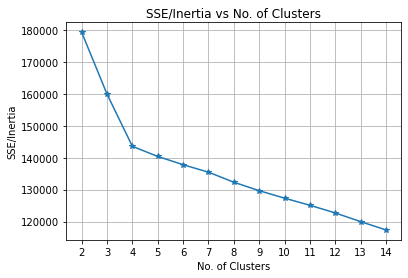

In [28]:
ax = plt.subplot()
title = 'SSE/Inertia vs No. of Clusters'
ax.plot(list(inertias.keys()), list(inertias.values()),'-*')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE/Inertia')
plt.title('SSE/Inertia vs No. of Clusters')
ax.set_xticks(np.arange(2, 15))
ax.grid()
plt.show()

In [29]:
# Based on the graph above, we choose 4 as the best value of K
op_k = 4
kmeans4 = KMeans(n_clusters = op_k, random_state = 2020)
y_pred4 = kmeans4.fit_predict(X_scaled)

In [30]:
# add the cluster results to the data frame
df6['cluster'] = y_pred4
df6.head(2)

,item_count,item_name_burger,item_name_fries,item_name_salad,item_name_shake,location_1,location_2,location_3,location_4,location_5,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,cluster
0,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df6.groupby(['cluster']).mean()

,item_count,item_name_burger,item_name_fries,item_name_salad,item_name_shake,location_1,location_2,location_3,location_4,location_5,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
cluster,,,,,,,,,,,,,,,,,,,,,
0,9.768663,0.0,1.0,0.0,0.0,0.109679,0.101502,0.110135,0.119072,0.105495,...,0.055144,0.019509,0.049135,0.084122,0.099182,0.086556,0.050542,0.013196,0.007188,0.063967
1,8.587284,1.0,0.0,0.0,0.0,0.108308,0.100453,0.108955,0.122170,0.103271,...,0.026707,0.012522,0.056557,0.100591,0.119120,0.103087,0.058266,0.011228,0.004482,0.074993
2,4.626474,0.0,0.0,1.0,0.0,0.119797,0.084490,0.119210,0.114129,0.117582,...,0.090222,0.023712,0.028337,0.063253,0.088007,0.069442,0.027034,0.011986,0.008859,0.019022
3,7.706810,0.0,0.0,0.0,1.0,0.094606,0.113663,0.095350,0.131293,0.088894,...,0.015768,0.013222,0.074368,0.134459,0.159104,0.137811,0.076603,0.012850,0.002173,0.054255


In [64]:
df6.groupby(['cluster']).median()

,item_count,item_name_burger,item_name_fries,item_name_salad,item_name_shake,location_1,location_2,location_3,location_4,location_5,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
cluster,,,,,,,,,,,,,,,,,,,,,
0,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df5['cluster'] = y_pred4
df5.head()

,location,item_name,hour,date,item_count,cluster
0,1,burger,0,2019-01-02,4,1
1,1,burger,0,2019-01-03,4,1
2,1,burger,0,2019-01-04,7,1
3,1,burger,0,2019-01-06,3,1
4,1,burger,0,2019-01-07,4,1


In [63]:
df9 = df5.groupby(['cluster']).mean()
df9['item_name'] = ['fries','burger','salad','shake']
df9

,location,hour,item_count,item_name
cluster,,,,
0,5.077886,13.287051,9.768663,fries
1,5.097034,13.311385,8.587284,burger
2,5.072438,13.559247,4.626474,salad
3,5.161463,14.414985,7.706810,shake


In [65]:
df10 = df5.groupby(['cluster']).median()
df10

,location,hour,item_count
cluster,,,
0,5,14,5
1,5,16,4
2,5,13,3
3,5,17,4


In [47]:
df7 = df5.groupby(['date','cluster','item_name']).agg({'location': 'mean', 'item_count': 'mean'})

In [48]:
df7.head()

location  item_count
date       cluster item_name                      
2019-01-01 0       fries      5.046875   11.125000
           1       burger     5.229167   10.541667
           2       salad      5.071429    4.904762
           3       shake      5.486486    9.162162
2019-01-02 0       fries      4.926471   11.205882

In [72]:
df8 = df5.groupby(['date','cluster','item_name'], as_index = False).agg({'item_count': 'sum'})

In [73]:
df8.head()

,date,cluster,item_name,item_count
0,2019-01-01,0,fries,712
1,2019-01-01,1,burger,506
2,2019-01-01,2,salad,206
3,2019-01-01,3,shake,339
4,2019-01-02,0,fries,762


In [77]:
 df8[df8.date =='2019-02-14']

,date,cluster,item_name,item_count
176,2019-02-14,0,fries,660
177,2019-02-14,1,burger,469
178,2019-02-14,2,salad,191
179,2019-02-14,3,shake,331


In [78]:
 df8[df8.date =='2019-12-25']

,date,cluster,item_name,item_count
1432,2019-12-25,0,fries,782
1433,2019-12-25,1,burger,533
1434,2019-12-25,2,salad,249
1435,2019-12-25,3,shake,363


In [57]:
df8.sort_values(by='item_count', ascending=False)

,,,item_count
date,cluster,item_name,
2019-08-09,0,fries,849
2019-04-29,0,fries,849
2019-04-26,0,fries,835
2019-07-12,0,fries,830
2019-05-03,0,fries,821
...,...,...,...
2019-09-10,2,salad,144
2019-01-21,2,salad,143
2019-07-30,2,salad,140
